In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 11s 67ms/step - loss: 0.4390 - tp: 4083.0000 - fp: 1263.0000 - tn: 3939.0000 - fn: 1119.0000 - accuracy: 0.7710 - precision: 0.7637 - recall: 0.7849 - auc: 0.8701 - val_loss: 0.6215 - val_tp: 190.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 114.0000 - val_accuracy: 0.6562 - val_precision: 0.6667 - val_recall: 0.6250 - val_auc: 0.7832
Epoch 2/50
163/163 [==============================] - 10s 58ms/step - loss: 0.2559 - tp: 4634.0000 - fp: 577.0000 - tn: 4625.0000 - fn: 568.0000 - accuracy: 0.8899 - precision: 0.8893 - recall: 0.8908 - auc: 0.9603 - val_loss: 0.3978 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9121
Epoch 3/50
163/163 [==============================] - 10s 58ms/step - loss: 0.2103 - tp: 4767.0000 - fp: 453.0000 - tn: 4763.0000 - fn: 449.0000 - accuracy: 0.9135 - precision: 0.9132 - recall: 0.9139 - auc: 0

Epoch 22/50
163/163 [==============================] - 9s 57ms/step - loss: 0.1297 - tp: 4926.0000 - fp: 282.0000 - tn: 4920.0000 - fn: 276.0000 - accuracy: 0.9464 - precision: 0.9459 - recall: 0.9469 - auc: 0.9897 - val_loss: 0.4107 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8594
Epoch 23/50
163/163 [==============================] - 9s 57ms/step - loss: 0.1401 - tp: 4926.0000 - fp: 289.0000 - tn: 4927.0000 - fn: 290.0000 - accuracy: 0.9445 - precision: 0.9446 - recall: 0.9444 - auc: 0.9877 - val_loss: 0.3930 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8750
Epoch 24/50
163/163 [==============================] - 9s 58ms/step - loss: 0.1374 - tp: 4900.0000 - fp: 285.0000 - tn: 4903.0000 - fn: 288.0000 - accuracy: 0.9448 - precision: 0.9450 - recall: 0.9445 - auc: 0.98

Epoch 43/50
163/163 [==============================] - 10s 60ms/step - loss: 0.1175 - tp: 4955.0000 - fp: 250.0000 - tn: 4952.0000 - fn: 247.0000 - accuracy: 0.9522 - precision: 0.9520 - recall: 0.9525 - auc: 0.9912 - val_loss: 0.4717 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.8301
Epoch 44/50
163/163 [==============================] - 10s 60ms/step - loss: 0.1122 - tp: 4988.0000 - fp: 232.0000 - tn: 4984.0000 - fn: 228.0000 - accuracy: 0.9559 - precision: 0.9556 - recall: 0.9563 - auc: 0.9920 - val_loss: 0.3157 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9414
Epoch 45/50
163/163 [==============================] - 9s 58ms/step - loss: 0.1202 - tp: 4955.0000 - fp: 243.0000 - tn: 4959.0000 - fn: 247.0000 - accuracy: 0.9529 - precision: 0.9533 - recall: 0.9525 - auc: 

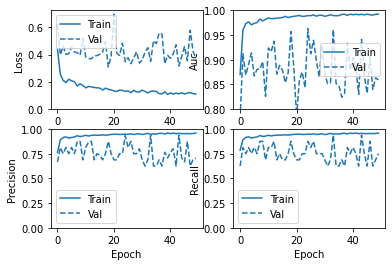

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.96      0.83      0.89       234
   PNEUMONIA       0.90      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624



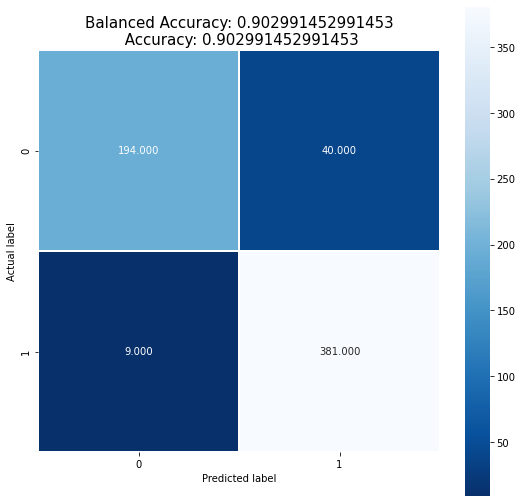

In [13]:
cnn.display_confusion_matrix(test_set)